**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# Graded Challenge 2

- Name : Fadhil Muhammad Irfan
- Batch : 10

## Description

### Objective
Tugas:
- Mampu memuat data gambar
- Mampu melakukan transformasi tipe data gambar ke data yang siap olah
- Mampu melakukan eksplorasi data gambar
- Mampu menerapkan konsep kalkulus pada pengolahan citra menggunakan library atau metode numerik from scratch
- Mampu menerapkan konsep linear algebra pada pengolahan citra menggunakan library atau metode numerik from scratch
- Mampu memvisualisasikan gambar menggunakan matplotlib

Individu:
- Menentukan nilai threshold untuk mendeteksi edge pada objek utama pada gambar yaitu Anjing
### Problem Statement

- Terdapat objek pemandangan seperti pohon dan rumput selain objek utama

## Working Area

### Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Data Loading

Membaca data atau dalam kasus ini adalah merupakan gambar dengan tipe file .jpg

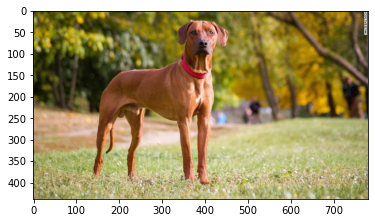

In [2]:
image = plt.imread('dog.jpg') 
plt.imshow(image)

Data yang didapat merupakan pixel atau tensor

In [3]:
image

array([[[ 86,  93,  39],
        [ 88,  93,  39],
        [ 87,  90,  33],
        ...,
        [ 48,  41,  15],
        [ 46,  39,  10],
        [ 59,  52,  23]],

       [[ 77,  84,  30],
        [ 77,  84,  30],
        [ 78,  83,  25],
        ...,
        [ 46,  39,  13],
        [ 64,  57,  29],
        [ 37,  30,   1]],

       [[ 64,  73,  20],
        [ 66,  73,  19],
        [ 68,  73,  17],
        ...,
        [ 56,  48,  25],
        [ 44,  37,   9],
        [ 70,  60,  33]],

       ...,

       [[165, 151, 106],
        [159, 144, 101],
        [151, 134,  91],
        ...,
        [150, 139,  85],
        [149, 138,  84],
        [145, 134,  80]],

       [[164, 149, 106],
        [157, 142,  99],
        [149, 131,  91],
        ...,
        [155, 143,  93],
        [153, 141,  89],
        [148, 136,  84]],

       [[164, 149, 108],
        [157, 142, 101],
        [146, 131,  90],
        ...,
        [160, 148, 100],
        [157, 145,  97],
        [150, 138,  90]]

Data yang akan diolah merupakan gambar RGB dengan array 3-Dimensi atau Tensor

In [4]:
image.shape

(438, 780, 3)

### Data Cleaning
Tujuan: 
- Mengubah gambar menjadi 2-Dimensional Array dengan metode Grayscale

Data yang merupakan 3-Dimensional array akan difilter menjadi 3 matrix yang berbeda sesuai dengan warna gambar yang akan dihasilkan, yaitu: Red, Green, dan Blue dengan baris dan kolom 438 dan 780

In [5]:
Red = image[:,:,0] #akses matrix pertama di dalam Tensor
Green = image[:,:,1] #akses matrix kedua di dalam Tensor
Blue = image[:,:,2] #akses matrix ketiga di dalam Tensor

print('Shape R:',Red.shape)
print('Shape G:',Green.shape)
print('Shape B:',Blue.shape)

Shape R: (438, 780)
Shape G: (438, 780)
Shape B: (438, 780)


Visualisasi dari matrix yang telah difilter:

Text(0.5, 1.0, 'Gambar Filter B')

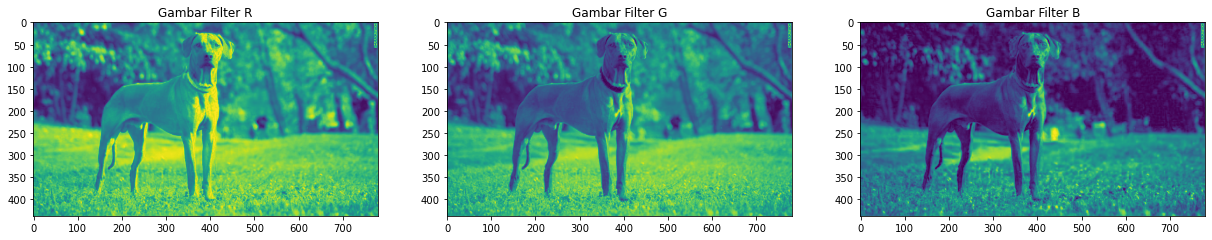

In [6]:
fig, ax = plt.subplots(ncols=3,figsize=(21,10))
ax[0].imshow(Red)
ax[0].set_title('Gambar Filter R')
ax[1].imshow(Green)
ax[1].set_title('Gambar Filter G')
ax[2].imshow(Blue)
ax[2].set_title('Gambar Filter B')

Matrix yang telah difilter (Red, Green, dan Blue) akan dirubah menjadi grayscale atau gambar hitam putih.

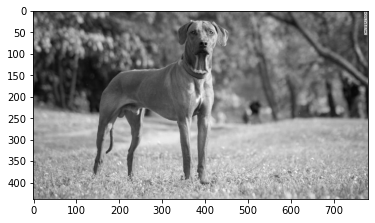

In [7]:
gray = 0.299*Red + 0.587*Green + 0.114*Blue
gray

plt.imshow(gray, cmap='gray')

### Image Processing
Tujuan:
- Mencari vektor gradien atau turunan parsial dari pixel value yang terdapat pada gambar Grayscale
- Menghitung gradient magnitude
- Menentukan threshold untuk mendeteksi edge pada objek utama yaitu anjing
- Melakukan perkalian Matriks

**Vektor Gradien atau Turunan Parsial**

Text(0.5, 1.0, '$\\partial_y img$')

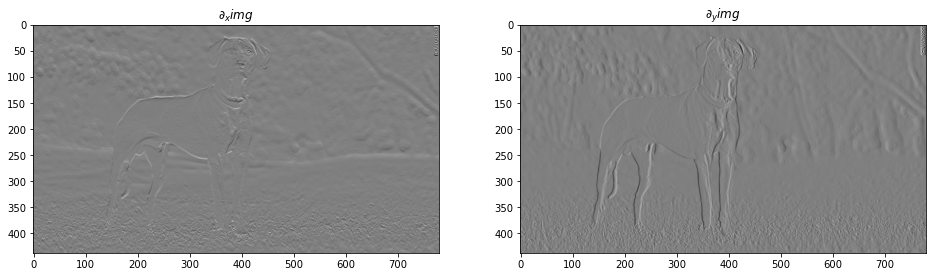

In [8]:
dx, dy = np.gradient(gray) # 2-D array

fig, ax = plt.subplots(ncols=2,figsize=(16,5))

ax[0].imshow(dx, cmap='gray')
ax[0].set_title(r'$\partial_x img$')

ax[1].imshow(dy, cmap='gray')
ax[1].set_title(r'$\partial_y img$')

- Hasil penurunan dalam arah x menunjukkan jika gambar yang timbul ada pada arah horizontal. Dapat dilihat pada garis-garis yang arahnya menyamping seperti rumput.
- Sedangkan, penurunan dalam arah y menunjukkan jika gambar yang timbul ada pada arah vertikal. Dapat dilihat pada garis-garis yang arahnya keatas seperti kaki anjing dan batang pohon.

**Menghitung Gradient Magnitude**

In [9]:
magnitude = np.sqrt(dx**2 + dy**2)
magnitude

array([[  9.01984501,   9.65779131,   8.14811905, ...,   2.56468911,
         18.88161108,  25.55386468],
       [ 10.242     ,  10.30793102,   8.78140792, ...,   6.97657699,
          4.76523766,  27.49518871],
       [  8.75538806,   9.0101237 ,   7.91386304, ..., 107.28512147,
         15.15513236,  31.36270513],
       ...,
       [  6.51476487,   8.24805857,   9.75569067, ...,   2.34414259,
          2.85438369,   4.09511981],
       [  7.02762451,   8.42720453,   8.5482165 , ...,   5.00640273,
          5.38452117,   5.5863738 ],
       [  7.00371216,   9.00288754,   8.93786335, ...,   5.23781484,
          6.69745743,   7.4183513 ]])

Visualisasi dari matrix hasil perhitungan gradient magnitude

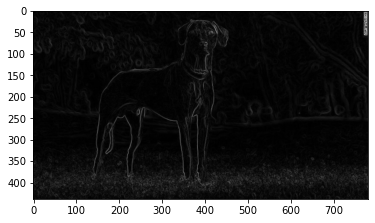

In [10]:
plt.imshow(magnitude, cmap = 'gray')

Dapat dilihat kalau edge sudah mulai terdeteksi, yang dimana garis-garis mulai lebih jelas terlihat dibandingkan dx dan dy sebelum digabungkan. Akan tetapi, disini kita berusaha untuk mendeteksi Edge pada objek utama yaitu Anjing-nya saja. Oleh karena itu dibutuhkan thresholding.

**Menentukan Threshold**

Percobaan 1
- Nilai Threshold lebih besar atau samadengan 30, selain itu akan dibuat sama dengan 0

(438, 780)


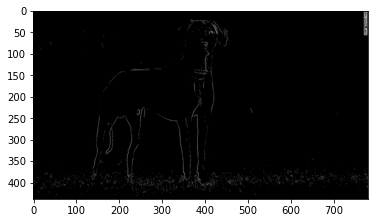

In [11]:
T1 = 30 #Threshold 30
pic1 = np.where(magnitude >= T1, magnitude, 0)
print(pic1.shape)

plt.imshow(pic1, cmap = 'gray')

Edge dari anjing sudah terdeteksi, akan tetapi terdapat garis putus-putus khususnya dibagian kepala sebelah kiri dari anjing
Percobaan 2
- Nilai threshold dibawah 30, selain itu akan dibuat sama dengan 0

(438, 780)


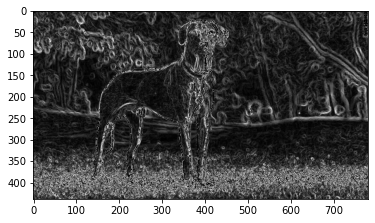

In [12]:
T2 = 30
pic2 = np.where(magnitude < T2, magnitude, 0)
print(pic2.shape)

plt.imshow(pic2, cmap = 'gray')

Di percobaan kedua ini menunjukkan bahwa semakin kecil threshold maka semakin jelas garis-garis yang ada pada gambar. Oleh karena itu, garis selain objek utama pun terdeteksi garis tepinya atau edge.

Percobaan 3
- Nilai threshold diatas atau samadengan 15

(438, 780)


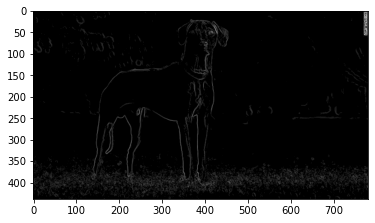

In [13]:
T3 = 15
pic3 = np.where(magnitude >= T3, magnitude, 0)
print(pic3.shape)

plt.imshow(pic3, cmap = 'gray')

Pada percobaan 3, edge pada objek utama terdeteksi yang dimana khususnya kepala bagian kiri dari objek Anjing sudah terbentuk. Kekurangan dari percobaan ini adalah edge dari pepohonan mulai terdeteksi, tetapi hanya sebagian.

**Edge terpilih:**

Edge yang akan dipilih adalah edge dengan magnitude diatas atau sama dengan 15 yaitu percobaan 3 karena seluruh badan anjing sudah terlihat tidak seperti percobaan 1 yang dimana bagian kepala sebelah kirinya terpotong dan juga tidak seperti percobaan 2 yang dimana objek selain Anjing juga ikut terdeteksi.

**Perkalian Matriks**

Matriks yang akan dikalikan dengan threshold yang terpilih yaitu **Percobaan 3** merupakan matriks identitas yang telah dipotong dan dinamakan sebagai matriks "I"

In [14]:
I = np.eye(780)[:,:460]
print(I.shape)
print(I)

(780, 460)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Matriks "I" mempunyai baris dan kolom sebanyak 780 dan 460. Saat Percobaan 3 dikalikan dengan "I" akan menghasilkan gambar:

(438, 460)


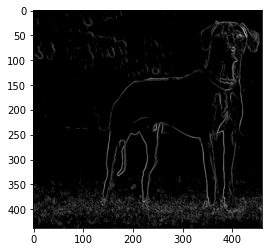

In [15]:
pic = pic3 @ I

print(pic.shape)
plt.imshow(pic, cmap='gray')

Dapat dilihat bahwa matriks yang ada akan terpotong, yang dimana kolom matrix di Percobaan 3 yang awalnya adalah 780 menjadi 460.

## Conclusions, Assumptions, Overall Analysis

- Nilai threshold yang dipakai untuk mendeteksi edge pada objek utama adalah nilai magnitude yang diatas atau samadengan 15